<a href="https://colab.research.google.com/github/HRS5020/Tensorflow/blob/main/Fashion_mnist_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow verion = ", tf.__version__)

Tensorflow verion =  2.8.0


In [57]:
# load the dataset

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


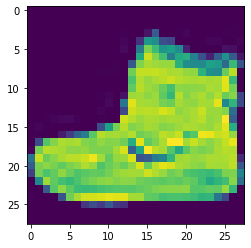

In [58]:
# sample training data visualisation

index =0

np.set_printoptions(linewidth=320)
# check the raw data
# print(f'LABEL: {training_labels[index]}')
# print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [59]:
# Normalize the pixel values of the train and test images

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [60]:
print(training_labels)

[9 0 0 ... 3 0 5]


In [61]:
# Build the classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, batch_size=128)



Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5506 - accuracy: 0.8108
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4103 - accuracy: 0.8553
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3691 - accuracy: 0.8685
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3413 - accuracy: 0.8770
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3274 - accuracy: 0.8815


In [62]:
# Check how the model performs on unseen data 

result = model.evaluate(test_images, test_labels)
print('Evaluation resuls:\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8755
Evaluation resuls:
Loss = 0.35658738017082214 
Accuracy = 0.8755000233650208


for a 128 hidden neurons in a hidden layer with relu activation fn,
we could achieve the accuracy of 0.88 with training data and 0.86 with test data in 5 epochs.

Now, we will experiment with these parameters and see the differences in result.

In [63]:
# below returns the predicted value of each class by the trained model for each test images
classifications = model.predict(test_images)

# Example output probability for first test image
print(classifications[0])
print(np.argmax(classifications[0]))

[1.0720517e-05 6.1563625e-08 2.6664566e-06 2.3776727e-07 2.3234368e-06 2.7330868e-02 1.5999334e-05 5.9978161e-02 1.6564422e-03 9.1100246e-01]
9


**Imapct of number neurons in hidden layer **

In [64]:
# classification model function 

def classification_model(hidden_neurons,hidden_activation_fn):
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(hidden_neurons, activation=hidden_activation_fn), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return model

In [65]:
# 512 hidden layer neurons
model1 = classification_model(512, tf.nn.relu)
model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(training_images, training_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5099 - accuracy: 0.8217
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3769 - accuracy: 0.8645
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3342 - accuracy: 0.8792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3060 - accuracy: 0.8875
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2864 - accuracy: 0.8951


In [66]:
# 1024 hidden layer neurons
model2 = classification_model(1024, tf.nn.relu)
model2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(training_images, training_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.4985 - accuracy: 0.8237
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3664 - accuracy: 0.8675
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 0.3208 - accuracy: 0.8832
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.2975 - accuracy: 0.8905
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.2817 - accuracy: 0.8968


In [67]:
result = model1.evaluate(test_images, test_labels)
print('Evaluation resuls for model 1 :\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

result = model2.evaluate(test_images, test_labels)
print('Evaluation resuls for model 2 :\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8755
Evaluation resuls for model 1 :
Loss = 0.3418695032596588 
Accuracy = 0.8755000233650208
313/313 [==============================] - 2s 5ms/step - loss: 0.3390 - accuracy: 0.8784
Evaluation resuls for model 2 :
Loss = 0.33900701999664307 
Accuracy = 0.8784000277519226


Accuracy does improve with increased neurons as well as time to train the model.
However, the increase in training accuracy is negligible.
Model 2 performs better for test data with 86.92% acc as compared model 1 with 82.38%

# Effect of number Epochs 

In [68]:
# Build the classification model

model3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])





# Run a loop cloning the model for diff epochs
for i in [5,10,15]:

    model_cloned = tf.keras.models.clone_model(model3)

    model_cloned.compile(optimizer = tf.optimizers.Adam(),
                         loss = 'sparse_categorical_crossentropy',
                         metrics=['accuracy'])

    model_cloned.fit(training_images, training_labels, epochs=i, batch_size=128)

    result = model_cloned.evaluate(test_images, test_labels)
    print('Evaluation resuls for {} epochs :\nLoss = {} \nAccuracy = {}'.format(i, result[0],result[1]))




Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5497 - accuracy: 0.8109
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4007 - accuracy: 0.8592
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3661 - accuracy: 0.8698
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3384 - accuracy: 0.8772
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8691
Evaluation resuls for 5 epochs :
Loss = 0.3687317669391632 
Accuracy = 0.8690999746322632
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5540 - accuracy: 0.8092
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4068 - accuracy: 0.8571
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3655 - accuracy: 0.8693
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3403 - accuracy: 0.8777
Epoch 5/10
469/

In [72]:
# use callbacks to stop training once desired accuracy is achieved.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4738 - accuracy: 0.8311
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3584 - accuracy: 0.8697
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3221 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2989 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2788 - accuracy: 0.8974
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.9014
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2656 - accuracy: 0.9014
